In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("/Users/sky/Desktop/CS521/Finalproject/t.csv")

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
df.shape

(2919, 81)

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df = df.dropna(subset=['SalePrice'])

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

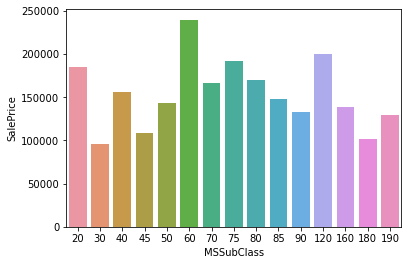

In [9]:
sns.barplot(x = "MSSubClass", y = "SalePrice", ci = None, data = df)

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

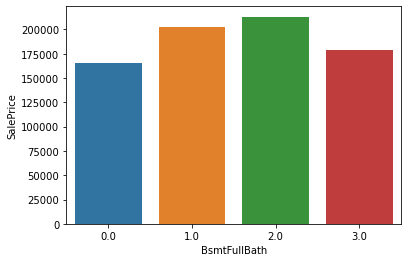

In [10]:
sns.barplot(x = "BsmtFullBath", y = "SalePrice", ci = None, data = df)

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

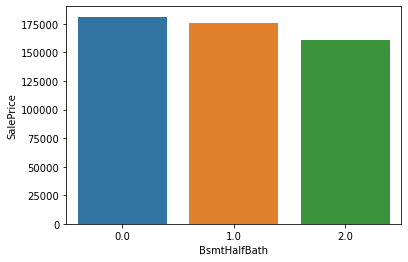

In [11]:
sns.barplot(x = "BsmtHalfBath", y = "SalePrice", ci = None, data = df)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

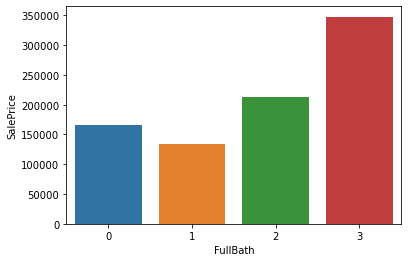

In [12]:
sns.barplot(x = "FullBath", y = "SalePrice", ci = None, data = df)

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

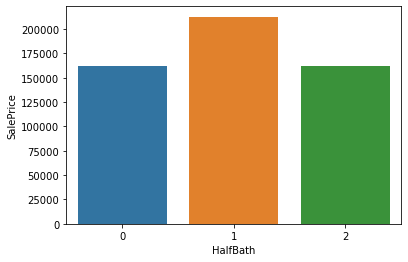

In [13]:
sns.barplot(x = "HalfBath", y = "SalePrice", ci = None, data = df)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

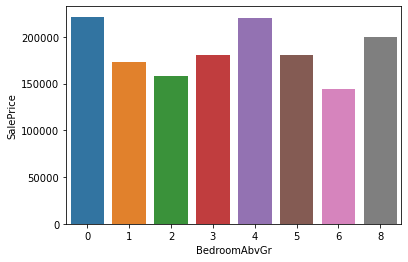

In [14]:
sns.barplot(x = "BedroomAbvGr", y = "SalePrice", ci = None, data = df)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

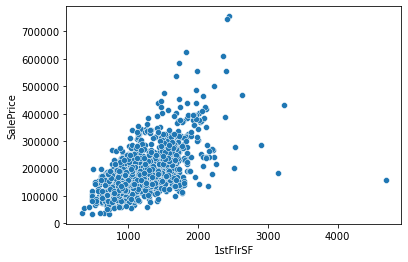

In [15]:
sns.scatterplot(data = df, x = "1stFlrSF", y = "SalePrice")

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

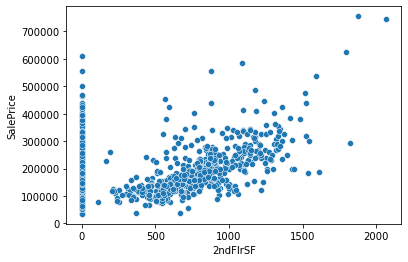

In [16]:
sns.scatterplot(data = df, x = "2ndFlrSF", y = "SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

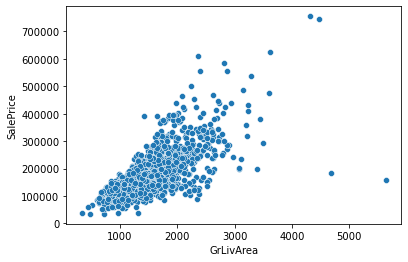

In [17]:
sns.scatterplot(data = df, x = "GrLivArea", y = "SalePrice")

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

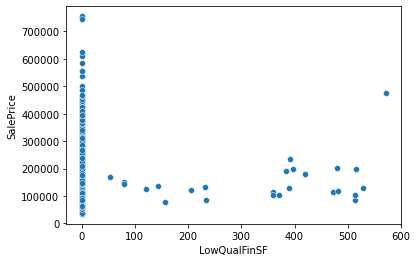

In [18]:
sns.scatterplot(data = df, x = "LowQualFinSF", y = "SalePrice")

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

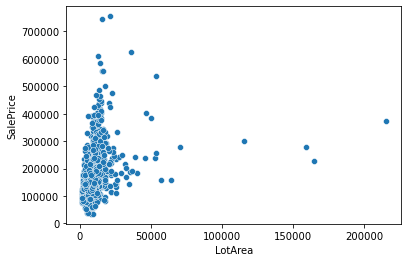

In [19]:
sns.scatterplot(data = df, x = "LotArea", y = "SalePrice")

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

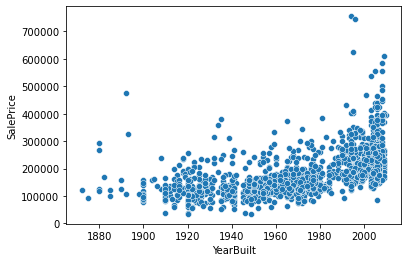

In [20]:
sns.scatterplot(data = df, x = "YearBuilt", y = "SalePrice")

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

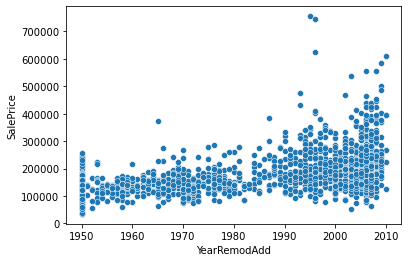

In [21]:
sns.scatterplot(data = df, x = "YearRemodAdd", y = "SalePrice")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

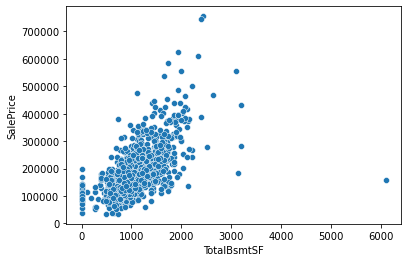

In [22]:
sns.scatterplot(data = df, x = "TotalBsmtSF", y = "SalePrice")

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

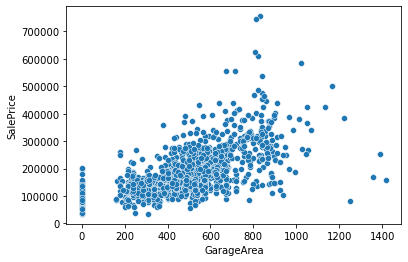

In [23]:
sns.scatterplot(data = df, x = "GarageArea", y = "SalePrice")

In [24]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
df1 = df[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
          'BedroomAbvGr','1stFlrSF','2ndFlrSF','GrLivArea','LowQualFinSF','LotArea','YearBuilt',
          'YearRemodAdd','TotalBsmtSF','GarageArea','SalePrice']]

In [26]:
df1 = df1.dropna()

In [27]:
df1.head(10)

,MSSubClass,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,1stFlrSF,2ndFlrSF,GrLivArea,LowQualFinSF,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageArea,SalePrice
0,60,1.0,0.0,2,1,3,856,854,1710,0,8450,2003,2003,856.0,548.0,208500.0
1,20,0.0,1.0,2,0,3,1262,0,1262,0,9600,1976,1976,1262.0,460.0,181500.0
2,60,1.0,0.0,2,1,3,920,866,1786,0,11250,2001,2002,920.0,608.0,223500.0
3,70,1.0,0.0,1,0,3,961,756,1717,0,9550,1915,1970,756.0,642.0,140000.0
4,60,1.0,0.0,2,1,4,1145,1053,2198,0,14260,2000,2000,1145.0,836.0,250000.0
5,50,1.0,0.0,1,1,1,796,566,1362,0,14115,1993,1995,796.0,480.0,143000.0
6,20,1.0,0.0,2,0,3,1694,0,1694,0,10084,2004,2005,1686.0,636.0,307000.0
7,60,1.0,0.0,2,1,3,1107,983,2090,0,10382,1973,1973,1107.0,484.0,200000.0
8,50,0.0,0.0,2,0,2,1022,752,1774,0,6120,1931,1950,952.0,468.0,129900.0
9,190,1.0,0.0,1,0,2,1077,0,1077,0,7420,1939,1950,991.0,205.0,118000.0


In [28]:
model = linear_model.LinearRegression()

In [29]:
X = df1[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
        'BedroomAbvGr','1stFlrSF','2ndFlrSF','GrLivArea','LowQualFinSF','LotArea','YearBuilt',
        'YearRemodAdd','TotalBsmtSF','GarageArea']]
y = df1['SalePrice']

In [30]:
X.corr()

,MSSubClass,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,1stFlrSF,2ndFlrSF,GrLivArea,LowQualFinSF,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageArea
MSSubClass,1.000000,0.003491,-0.002333,0.131608,0.177354,-0.023438,-0.251758,0.307886,0.074853,0.046474,-0.139781,0.027850,0.040581,-0.238518,-0.098672
BsmtFullBath,0.003491,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,0.244671,-0.169494,0.034836,-0.047143,0.158155,0.187599,0.119470,0.307351,0.179189
BsmtHalfBath,-0.002333,-0.147871,1.000000,-0.054536,-0.012340,0.046519,0.001956,-0.023855,-0.018918,-0.005842,0.048046,-0.038162,-0.012337,-0.000315,-0.024536
FullBath,0.131608,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.380637,0.421378,0.630012,-0.000710,0.126031,0.468271,0.439046,0.323722,0.405656
HalfBath,0.177354,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.119916,0.609707,0.415772,-0.027080,0.014259,0.242656,0.183331,-0.048804,0.163549
BedroomAbvGr,-0.023438,-0.150673,0.046519,0.363252,0.226651,1.000000,0.127401,0.502901,0.521270,0.105607,0.119690,-0.070651,-0.040581,0.050450,0.065253
1stFlrSF,-0.251758,0.244671,0.001956,0.380637,-0.119916,0.127401,1.000000,-0.202646,0.566024,-0.014241,0.299475,0.281986,0.240379,0.819530,0.489782
2ndFlrSF,0.307886,-0.169494,-0.023855,0.421378,0.609707,0.502901,-0.202646,1.000000,0.687501,0.063353,0.050986,0.010308,0.140024,-0.174512,0.138347
GrLivArea,0.074853,0.034836,-0.018918,0.630012,0.415772,0.521270,0.566024,0.687501,1.000000,0.134683,0.263116,0.199010,0.287389,0.454868,0.468997
LowQualFinSF,0.046474,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,-0.014241,0.063353,0.134683,1.000000,0.004779,-0.183784,-0.062419,-0.033245,-0.067601


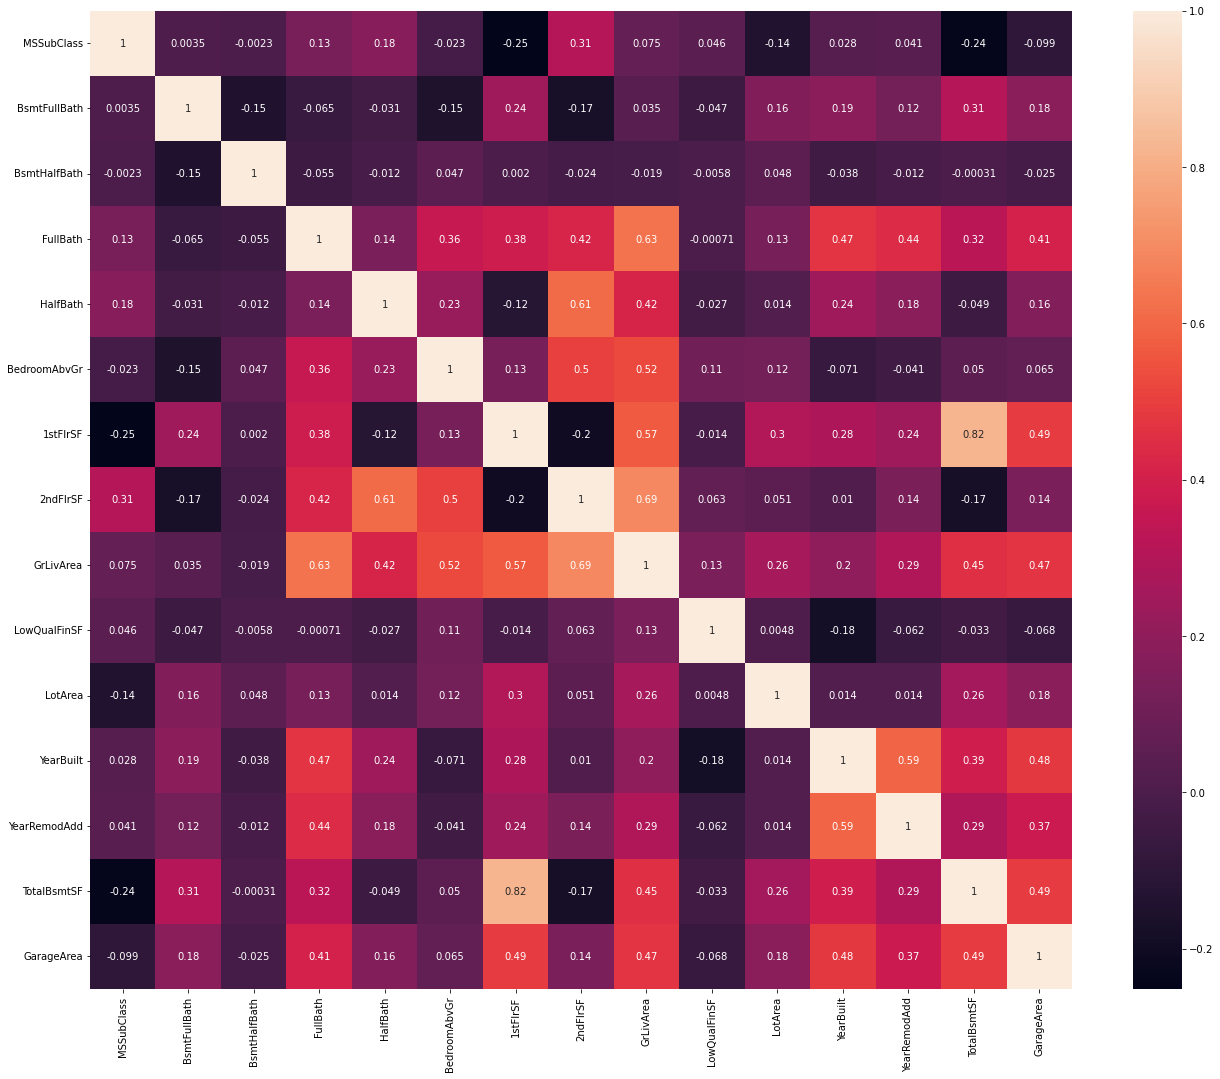

In [31]:
plt.figure(figsize=(22,18))
ax = sns.heatmap(X.corr(), annot=True)
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521)

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
pd.DataFrame(data = model.coef_.transpose(), index = X_train.columns, columns = ['Coef'])

,Coef
MSSubClass,-206.693422
BsmtFullBath,11469.240403
BsmtHalfBath,9876.370704
FullBath,6680.142243
HalfBath,209.079477
BedroomAbvGr,-13112.110716
1stFlrSF,21.470154
2ndFlrSF,30.188351
GrLivArea,53.815977
LowQualFinSF,2.157472


In [35]:
model.score(X_train, y_train)

0.7406419509807519

In [36]:
model.score(X_test, y_test)

0.7637973576860809

In [37]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
NewHouse = pd.DataFrame([{'MSSubClass': 80,
                          'BsmtFullBath': 0,
                          'BsmtHalfBath': 0,
                          'FullBath': 3,
                          'HalfBath': 1,
                          'BedroomAbvGr': 3,
                          '1stFlrSF': 1200,
                          '2ndFlrSF': 1000,
                          'GrLivArea': 1300,
                          'LowQualFinSF': 0,
                          'LotArea': 8000,
                          'YearBuilt': 2008,
                          'YearRemodAdd': 2010,
                          'TotalBsmtSF': 2000,
                          'GarageArea': 400}])

In [39]:
newprediction = model.predict(NewHouse)
newprediction

array([237968.07580289])

In [40]:
model2 = linear_model.LinearRegression()

In [41]:
X = df1[['MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
        'BedroomAbvGr','1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt',
        'YearRemodAdd','TotalBsmtSF','GarageArea']]
y = df1['SalePrice']

In [42]:
X.corr()

,MSSubClass,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,1stFlrSF,2ndFlrSF,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageArea
MSSubClass,1.000000,0.003491,-0.002333,0.131608,0.177354,-0.023438,-0.251758,0.307886,0.074853,0.027850,0.040581,-0.238518,-0.098672
BsmtFullBath,0.003491,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,0.244671,-0.169494,0.034836,0.187599,0.119470,0.307351,0.179189
BsmtHalfBath,-0.002333,-0.147871,1.000000,-0.054536,-0.012340,0.046519,0.001956,-0.023855,-0.018918,-0.038162,-0.012337,-0.000315,-0.024536
FullBath,0.131608,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.380637,0.421378,0.630012,0.468271,0.439046,0.323722,0.405656
HalfBath,0.177354,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.119916,0.609707,0.415772,0.242656,0.183331,-0.048804,0.163549
BedroomAbvGr,-0.023438,-0.150673,0.046519,0.363252,0.226651,1.000000,0.127401,0.502901,0.521270,-0.070651,-0.040581,0.050450,0.065253
1stFlrSF,-0.251758,0.244671,0.001956,0.380637,-0.119916,0.127401,1.000000,-0.202646,0.566024,0.281986,0.240379,0.819530,0.489782
2ndFlrSF,0.307886,-0.169494,-0.023855,0.421378,0.609707,0.502901,-0.202646,1.000000,0.687501,0.010308,0.140024,-0.174512,0.138347
GrLivArea,0.074853,0.034836,-0.018918,0.630012,0.415772,0.521270,0.566024,0.687501,1.000000,0.199010,0.287389,0.454868,0.468997
YearBuilt,0.027850,0.187599,-0.038162,0.468271,0.242656,-0.070651,0.281986,0.010308,0.199010,1.000000,0.592855,0.391452,0.478954


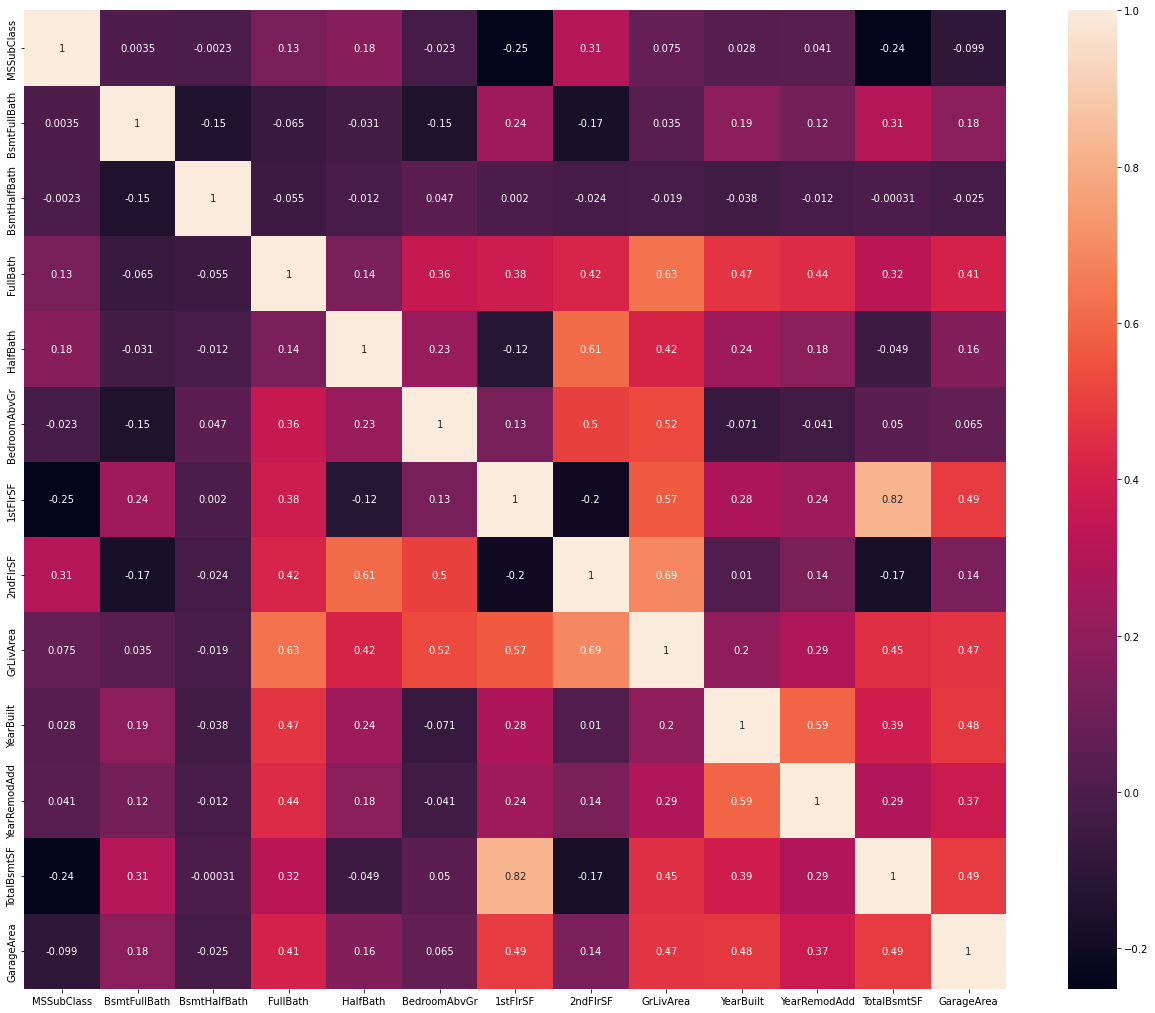

In [43]:
plt.figure(figsize=(22,18))
ax = sns.heatmap(X.corr(), annot=True)
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521)

In [45]:
model2.fit(X_train,y_train)

LinearRegression()

In [46]:
pd.DataFrame(data = model2.coef_.transpose(), index = X_train.columns, columns = ['Coef'])

,Coef
MSSubClass,-217.487379
BsmtFullBath,12713.657682
BsmtHalfBath,11293.176667
FullBath,7181.541405
HalfBath,149.636112
BedroomAbvGr,-13241.344106
1stFlrSF,22.140834
2ndFlrSF,30.169905
GrLivArea,55.453453
YearBuilt,513.642161


In [47]:
model2.score(X_train, y_train)

0.7377897264493847

In [48]:
model2.score(X_test, y_test)

0.7654573767606621

In [49]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
NewHouse2 = pd.DataFrame([{'MSSubClass': 80,
                          'BsmtFullBath': 0,
                          'BsmtHalfBath': 0,
                          'FullBath': 3,
                          'HalfBath': 1,
                          'BedroomAbvGr': 3,
                          '1stFlrSF': 1200,
                          '2ndFlrSF': 1000,
                          'GrLivArea': 1300,
                          'YearBuilt': 2008,
                          'YearRemodAdd': 2010,
                          'TotalBsmtSF': 2000,
                          'GarageArea': 400}])

In [51]:
newprediction2 = model2.predict(NewHouse2)
newprediction2

array([238492.48890618])